In [1]:
%load_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
import MC
import time
import pickle
import datetime
import Sensor
import math
%autoreload 2

In [5]:
def runTest():
    t1 = time.perf_counter()
    ret = MC.lunchPacketwithBatch(batchSize = 1e7,
                               nPhotonsRequested = 1e7,
                                nPhotonsToRun = 1e7,
                                muS = 1.0, g = 0.85, muA=100,
                                source = {'r': np.array([0.0, 0.0, 30.0]),
                                          'mu': np.array([0.0, 0.0, -1.0]),
                                          'method': 'pencil', 'time_profile': 'delta'},
                                detector = {'radius': 100.0},
                                control_param = {'max_N': 1e5,
                                                 'max_distance_from_det': 110},
                                normalize_d = None,
                                ret_cols = [0,1,2,3,4,5,6,7,11]
                                )                                
    print(ret[1][0], ret[1][1], time.perf_counter()-t1)
    ds = {'data': ret[0],
          'num_simulated': ret[1][0],
          'num_detected': ret[1][1]}
    with open('testdata.pickle', 'wb') as handle:
        pickle.dump(ds, handle)
        

       
def runTestParallel(device_id):
    t1 = time.perf_counter()
    ret = MC.lunchPacketwithBatch(batchSize = 1e7,
                               nPhotonsRequested = 1e7,
                                nPhotonsToRun = (1e7/8),
                                muS = 1.0, g = 0.85, muA=100,
                                source = {'r': np.array([0.0, 0.0, 30.0]),
                                          'mu': np.array([0.0, 0.0, -1.0]),
                                          'method': 'pencil', 'time_profile': 'delta'},
                                detector = {'radius': 100.0},
                                control_param = {'max_N': 1e5,
                                                 'max_distance_from_det': 110},
                                normalize_d = None,
                                ret_cols = [0,1,2,3,4,5,6,7,11],
                                device_id = device_id
                                )                                
    print(ret[1][0], ret[1][1], time.perf_counter()-t1)
    ds = {'data': ret[0],
          'num_simulated': ret[1][0],
          'num_detected': ret[1][1]}
    with open('testdata.pickle', 'wb') as handle:
        pickle.dump(ds, handle)
        
        
def runTestIllumination(muS = 1.0, 
                       source = {'r': np.array([0.0, 0.0, 30.0]),
                                 'mu': np.array([0.0, 0.0, -1.0]),
                                 'theta': 0.0,
                                 'method': 'cone', 'time_profile': 'delta'}
                                ):
    t1 = time.perf_counter()
    ret = MC.lunchPacketwithBatch(batchSize = 1e7,
                               nPhotonsRequested = 1e7,
                                nPhotonsToRun = 1e7,
                                muS = muS, g = 0.85, muA = 1000,
                                source = source,
                                detector = {'radius': 100.0},
                                control_param = {'max_N': 1e5,
                                                 'max_distance_from_det': 110},
                                normalize_d = None,
                                ret_cols = [0,1,2,3,4,5,6,7]
                                )                                
    print(ret[1][0], ret[1][1], time.perf_counter()-t1)
    ds = {'data': ret[0],
          'num_simulated': ret[1][0],
          'num_detected': ret[1][1]}
    with open('testdata.pickle', 'wb') as handle:
        pickle.dump(ds, handle) 
        
def runTargetTest():
    t1 = time.perf_counter()
    target_mask = np.zeros(shape=(60,60))
    target_mask[21:50,28:32]=1
    target_mask[16:21,15:45]=1
    target_gridsize = np.array([1,1])
    target_distance_from_camera = 10
    ret = MC.lunchPacketwithBatch(batchSize = 1e7,
                               nPhotonsRequested = 1e7,
                                nPhotonsToRun = 1e7,
                                muS = 1.0, g = 0.85, muA = 100,
                                source = {'r': np.array([0.0, 0.0, 30.0]),
                                          'mu': np.array([0.0, 0.0, -1.0]),
                                          'method': 'pencil', 'time_profile': 'delta'},
                                detector = {'radius': 100.0},
                                control_param = {'max_N': 1e5,
                                                 'max_distance_from_det': 110},
                                normalize_d = None,
                                ret_cols = [0,1,2,3,4,5,6,7],
                                target = {'type':1,
                                'mask':target_mask,
                                'grid_size':target_gridsize,
                                'z_target':target_distance_from_camera}
                                )
    print(ret[1][0], ret[1][1], time.perf_counter()-t1)
    ds = {'data': ret[0],
          'num_simulated': ret[1][0],
          'num_detected': ret[1][1]}
    with open('testdata.pickle', 'wb') as handle:
        pickle.dump(ds, handle)  
        
        
def runScatteringTargetTest():
    t1 = time.perf_counter()
    target_mask = np.zeros(shape=(60,60))
    target_mask[25:35, 25:35]=1
    target_gridsize = np.array([1,1])
    target_distance_from_camera = 10
    
    ret = MC.lunchPacketwithBatch(batchSize = 1e6,
                               nPhotonsRequested = 1e6,
                                nPhotonsToRun = 1e6,
                                muS = 0.5, g = 0.85, muA=100,
                                source = {'r': np.array([0.0, 0.0, 0.0]),
                                          'mu': np.array([0.0, 0.0, 1.0]),
                                          'method': 'pencil', 'time_profile': 'delta'},
                                detector = {'radius': 100.0},
                                control_param = {'max_N': 1e5,
                                                 'max_distance_from_det': 110},
                                normalize_d = None,
                                ret_cols = [0,1,2,3,4,5,6,7, 8, 9],
                                target = {'type':2,
                                'mask':target_mask,
                                'grid_size':target_gridsize,
                                'z_target':target_distance_from_camera}
                                )
    print(ret[1][0], ret[1][1], time.perf_counter()-t1)
    ds = {'data': ret[0],
          'num_simulated': ret[1][0],
          'num_detected': ret[1][1]}
    with open('testdata.pickle', 'wb') as handle:
        pickle.dump(ds, handle)  
        

def runTargetWithLensTest():
    t1 = time.perf_counter()
    target_mask = np.zeros(shape=(60,60))
    target_mask[21:50,28:32]=1
    target_mask[16:21,15:45]=1
    target_gridsize = np.array([1,1])
    target_distance_from_camera = 20

    t1 = time.perf_counter()
    ret = MC.lunchPacketwithBatch(batchSize = 1e7,
                               nPhotonsRequested = 1e7,
                                nPhotonsToRun = 5e7,
                                muS = 0.0001, g = 0.999, muA=1000,
                                source = {'r': np.array([0.0, 0.0, 0.0]),
                                          'mu': np.array([0.0, 0.0, 1.0]), 'size': 60, 'theta': 1.0,
                                          'method': 'area_cone', 'time_profile': 'delta'},
                             
                                  detector = {'type': 1, 'radius': 20.0, 'z_detector': 10.0, 'focus_target': target_distance_from_camera, 'det_size': 5.0},
                                control_param = {'max_N': 1e5,
                                                 'max_distance_from_det': 110},
                                normalize_d = None,
                                ret_cols = [0,1,2,3,4,5,6,7],
                                target = {'type':2,
                                'mask':target_mask,
                                'grid_size':target_gridsize,
                                'z_target':target_distance_from_camera}
                                )
    data = ret[0]
    data = data[data[:,0]>0, :]
    
    print(ret[1][0], ret[1][1], time.perf_counter()-t1)
    ds = {'data': ret[0],
          'num_simulated': ret[1][0],
          'num_detected': ret[1][1]}
    with open('testdata.pickle', 'wb') as handle:
        pickle.dump(ds, handle)  
        
        
def loadTest():
    with open('testdata.pickle', 'rb') as handle:
        ds = pickle.load(handle)

    data = ds['data']
    num_simulated = ds['num_simulated']
    num_detected = ds['num_detected']

    return data, num_simulated, num_detected


def plotTest(data):
    data = data[data[:,0]>0, :]
    plt.figure(figsize=(20,10))
    for i in range(9):
        plt.subplot(3, 4, i+1)
        plt.hist(data[:,i], bins=100)
    plt.show()
        
        
def plotTargetTest(data):
    data = data[:,[2,3,0]]
    measurement = Sensor.photonsTo3DMeasurement(data,camera = {'center': [0,0],'dim':[64,64],
                                                                'pixel_size':1, 'time_res':50,
                                                                'time_bin':100})
    measurement_xy = np.transpose(np.sum(measurement,axis=2))
    measurement_xt = np.sum(measurement,axis=1)
    ft = np.sum(measurement_xt,axis=0)
    plt.figure(figsize=(10,3))
    plt.subplot(131)
    plt.imshow(measurement_xy)
    plt.subplot(132)
    plt.imshow(measurement_xt)
    plt.subplot(133)
    plt.plot(ft)
    plt.show()
        
        
def testRun():
    print(datetime.datetime.now())
    runTest()
    data, num_simulated, num_detected = loadTest()
    plotTest(data)


def testRunParallel():
    print('Running in parallel')
    print(datetime.datetime.now())
    runTestParallel(-1)
    data, num_simulated, num_detected = loadTest()
    plotTest(data)
    
    
def testRunTarget():
    print(datetime.datetime.now())
    runTargetTest()
    data, num_simulated, num_detected = loadTest()
    plotTargetTest(data)
    
    
def testRunIllumination(muS = 1.0, 
                            source = {'r': np.array([0.0, 0.0, 30.0]),
                                      'mu': np.array([0.0, 0.0, -1.0]),
                                      'theta': 0.0,
                                      'method': 'cone', 'time_profile': 'delta'}
                                ):
    print(datetime.datetime.now())
    runTestIllumination(muS = muS, source=source)
    data, num_simulated, num_detected = loadTest()
    plotTest(data)

def testRunScatteringTarget():
    print(datetime.datetime.now())
    runScatteringTargetTest()
    data, num_simulated, num_detected = loadTest()
    data = data[data[:,0]>0, :]
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(3, 4, i+1)
        plt.hist(data[:,i], bins=100)
    plt.show()   
    
def testRunTargetWithLens():
    print(datetime.datetime.now())
    runTargetWithLensTest()
    data, num_simulated, num_detected = loadTest()
    plotTargetTest(data)
    plt.figure()
    _=plt.hist2d(data[:,3], data[:,2], bins=100)
    plt.axis('equal')
    
def testRunHard():
    print(datetime.datetime.now())
    target_mask = np.zeros(shape=(5,5))
    target_mask[2,2]=1
    target_gridsize = np.array([1,1])
    illum_pos = 15.0
    dist = 10
    illum_mux = -illum_pos / np.sqrt(illum_pos**2 + dist**2)
    illum_muz = np.sqrt(1-illum_mux**2)
    g=0.85
    mus = 0.2
    mua = 100

    t1 = time.perf_counter()
    ret = MC.lunchPacketwithBatch(batchSize = 1e8,
                                        nPhotonsRequested = 1e7, #max([req_background_photons, req_signal_photons]),
                                        nPhotonsToRun = 1e7,
                                        muS = mus, g = g, muA = mua,
                                        source = {'r': np.array([illum_pos, 0.0, 0.0]),
                                              'mu': np.array([illum_mux, 0.0, illum_muz]), 'theta': 0.4,
                                              'method': 'cone', 'time_profile': 'delta'},
                                        detector = {'type': 1, 'radius': 10.0, 
                                                    'z_detector': 10.0, 
                                                    'focus_target': dist},
                                        control_param = {'max_N': 1e5,
                                                         'max_distance_from_det': 100.0 / mus},
                                        normalize_d = None,
                                        ret_cols = [0,1,2,3,8,9],
                                        target = {'type':2,
                                                    'mask':target_mask,
                                                    'grid_size':target_gridsize,
                                                    'z_target':dist},
                                        device_id = -1
                                        )
    print(time.perf_counter()-t1)
    print(ret[1])
    data = ret[0]
    data = data[data[:,1]<100, :]
    plt.figure(figsize=(20,10))
    for i in range(4):
        plt.subplot(2,4,i+1)
        plt.hist(data[:,i], bins=100)
    
    data_ = data[data[:,4]>0, :]
    for i in range(4):
        plt.subplot(2,4,i+5)
        plt.hist(data_[:,i], bins=100)
    plt.show()
    
def diffApproxTransmittance(rho, d, t, muS, g, muA):
    # see https://www.osapublishing.org/ao/fulltext.cfm?uri=ao-28-12-2331&id=32504
    muSp = (1 - g) * muS
    znot = 1/muSp
    D = 1/(3*(muA + muSp))
    c = 1e-12*3e8*1e3 # speed of light in mm/ps
    den = 4*D*c*t
    retain = lambda dipole: (dipole * math.exp(-(dipole*dipole)/den))
    return (((4*math.pi*D*c) ** (1.5)) * (t**-2.5) * math.exp(-muA*c*t) * math.exp(-(rho*rho)/den)) * (
          retain(d - znot)
        - retain(d + znot)
        + retain(3 * d - znot)
        - retain(3 * d + znot)        
    )

def calculateDiffApprox(muS, g, muA, depth, dimensions, timebin):
    print(diffApproxTransmittance(0, 2, 10, 0.0001, 0.85, 100))
    values = np.zeros((dimensions[0], dimensions[1], timebin))
    center = [dimensions[0]/2, dimensions[1]/2]
    for i in range(dimensions[0]):
        for j in range(dimensions[1]):
            for t in range(timebin):
                rho = (math.sqrt((i-center[0])**2 + (j-center[1])**2))/64
                # shift timebin by 1 to prevent div/0 error
                values[i, j, t] = diffApproxTransmittance(rho, depth, t+1, muS, g, muA)
    values = np.absolute(values) # Get absolute values
    values = values / values.max() # Normalize
    return values
    
def plotDiffApprox(measurement):
    measurement_xy = np.transpose(np.sum(measurement,axis=2))
    measurement_xt = np.sum(measurement,axis=1)
    ft = np.sum(measurement_xt,axis=0)
    plt.figure(figsize=(10,3))
    plt.subplot(131)
    plt.imshow(measurement_xy)
    plt.subplot(132)
    plt.imshow(measurement_xt)
    plt.subplot(133)
    plt.plot(ft)
    plt.show()
    
def testRunDiffApprox():
    muS = 1.0
    muA = 100
    g = 0.85
    data = calculateDiffApprox(muS, g, muA, 10, [64, 64], 100)
    plotDiffApprox(data)

2019-07-11 10:23:25.534315
Detector type: 0, Aperture size: 100.0, f: 0.0, thickness: 0.0, R: 0.0, n: 0.0, z sensor: 0.0
10010624 6370825 23.717727975919843


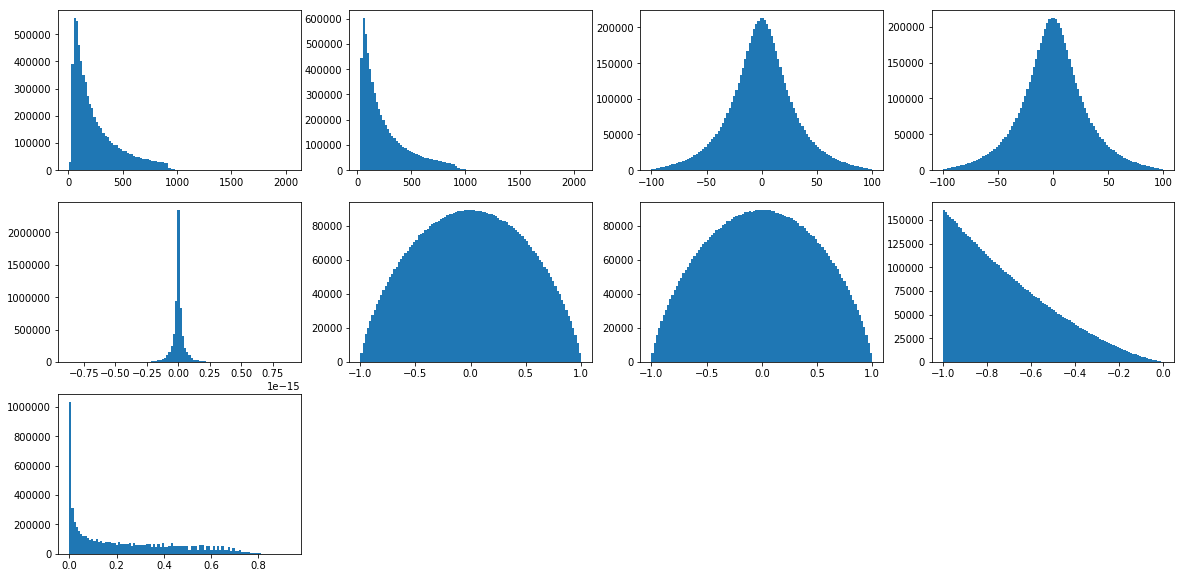

In [3]:
testRun()

#### Test after adding 2D target simulation feature

2019-07-11 10:25:18.889212
Detector type: 0, Aperture size: 100.0, f: 0.0, thickness: 0.0, R: 0.0, n: 0.0, z sensor: 0.0
10010624 6368473 14.008005006238818


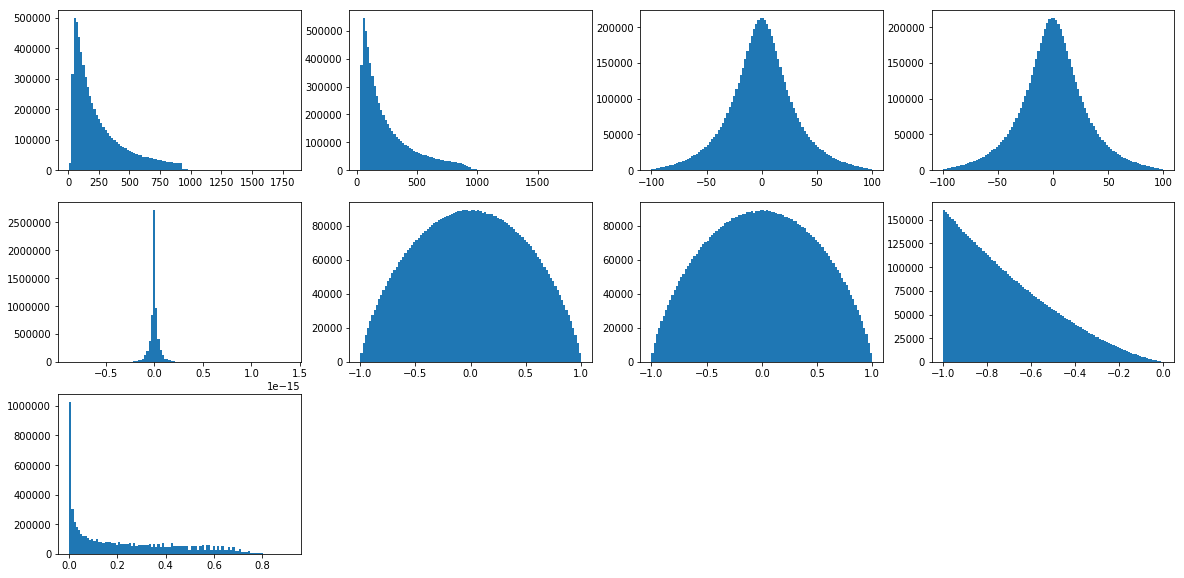

In [4]:
testRun() #Run time on Tomo's Computer

2019-07-11 10:29:02.574738
Detector type: 0, Aperture size: 100.0, f: 0.0, thickness: 0.0, R: 0.0, n: 0.0, z sensor: 0.0
10010624 419909 12.587707206606865


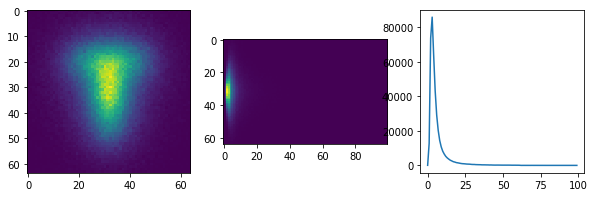

In [7]:
testRunTarget() #Run time on Tomo's Computer

#### Adding Illumination Source

In [ ]:
testRun() #Run time on Tomo's Computer

2019-07-11 10:36:46.268032
Detector type: 0, Aperture size: 100.0, f: 0.0, thickness: 0.0, R: 0.0, n: 0.0, z sensor: 0.0
10010624 7271926 95.23404777608812


IndexError: index 8 is out of bounds for axis 1 with size 8

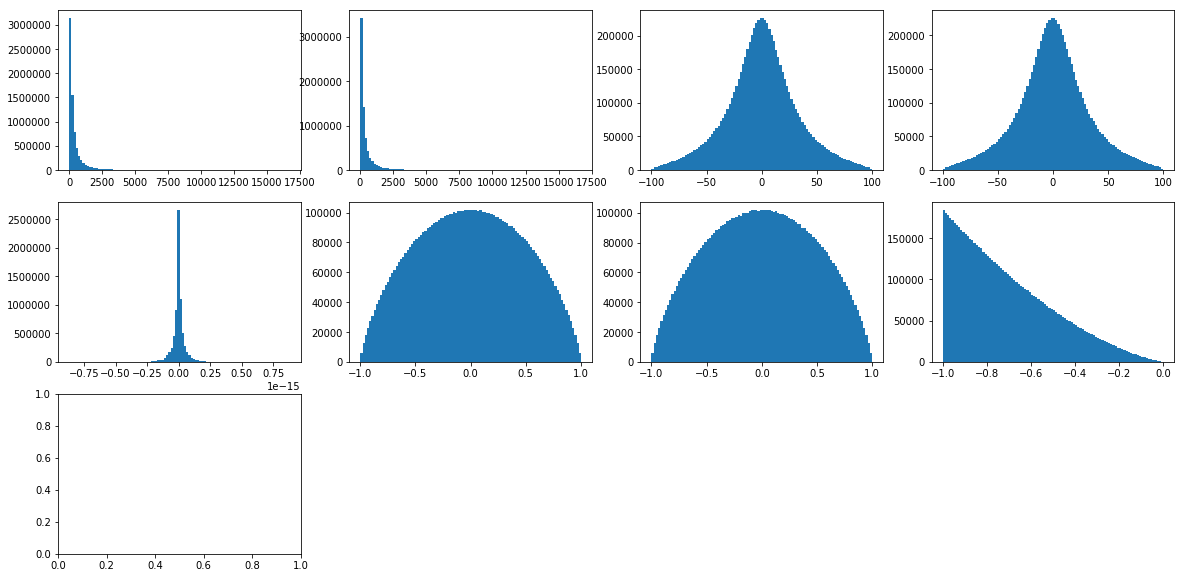

In [10]:
testRunIllumination(muS = 1.0, 
                       source = {'r': np.array([0.0, 0.0, 30.0]),
                                 'mu': np.array([0.0, 0.0, -1.0]),
                                 'theta': 0.0,
                                 'method': 'cone', 'time_profile': 'delta'}
                                ) #save as runTest() Comparing Time
testRunIllumination(muS = 0.0001,
                       source = {'r': np.array([0.0, 0.0, 30.0]),
                                 'mu': np.array([0.0, 0.0, -1.0]),
                                 'theta': 1.0, #theta is half angle
                                 'method': 'cone', 'time_profile': 'delta'}
                                ) #Test cone light source without scattering
testRunIllumination(muS = 0.0001,
                       source = {'r': np.array([0.0, 0.0, 30.0]),
                                 'mu': np.array([0.0, 0.0, -1.0]),
                                 'method': 'point', 'time_profile': 'delta'}
                                ) #Test point light source without scattering
testRunIllumination(muS = 0.0001,
                       source = {'r': np.array([0.0, 0.0, 30.0]),
                                 'mu': np.array([0.0, 0.0, -1.0]),
                                 'size': 30,
                                 'method': 'area', 'time_profile': 'delta'}
                                ) #Test area source without scattering
testRunIllumination(muS = 0.0001,
                       source = {'r': np.array([0.0, 0.0, 30.0]),
                                 'mu': np.array([0.0, 0.0, -1.0]),
                                 'size': 30,
                                 'theta': 1.0,
                                 'method': 'area_cone', 'time_profile': 'delta'}
                                ) #Test area cone source without scattering

# Adding scattering layer

In [ ]:
testRun()

In [ ]:
testRunScatteringTarget()

## Fixing a bug in scattering layer

In [ ]:
testRun()

In [ ]:
testRunScatteringTarget()

### Ading a lens

In [ ]:
testRun()

In [ ]:
testRunTargetWithLens()

### Basic Multi GPU

In [ ]:
testRun()

In [ ]:
t1 = time.perf_counter()
ret = MC.lunchPacketwithBatch(batchSize = 1e7,
                           nPhotonsRequested = 1e7,
                            nPhotonsToRun = 1e7,
                            muS = 1.0, g = 0.85,
                            source = {'r': np.array([0.0, 0.0, 30.0]),
                                      'mu': np.array([0.0, 0.0, -1.0]),
                                      'method': 'pencil', 'time_profile': 'delta'},
                            detector = {'radius': 100.0},
                            control_param = {'max_N': 1e5,
                                             'max_distance_from_det': 110},
                            normalize_d = None,
                            ret_cols = [0,1,2,3,4,5,6,7],
                            device_id = 6
                            )                                
print(ret[1], ret[2], time.perf_counter()-t1)

### Structured Light

In [ ]:
testRun()

In [ ]:
pattern = np.zeros(shape=(60,60))
pattern[21:50,28:32]=1
pattern[16:21,15:45]=1
testRunIllumination(muS = 0.0001, 
                    source = {'r': np.array([0.0, 0.0, 30.0]),
                              'mu': np.array([0.0, 0.0, -1.0]),
                              'theta': 0.0, 'size': 1,
                              'pattern': pattern,
                              'method': 'structured_pattern', 'time_profile': 'delta'}
                                ) #save as runTest() Comparing Time
data, num_simulated, num_detected = loadTest()
plotTargetTest(data)

In [ ]:
pattern = np.zeros(shape=(60,60))
pattern[21:50,28:32]=1
pattern[16:21,15:45]=1
testRunIllumination(muS = 0.0001, 
                    source = {'r': np.array([0.0, 0.0, 30.0]),
                              'mu': np.array([0.0, 0.0, -1.0]),
                              'theta': 0.3, 'size': 1,
                              'pattern': pattern,
                              'method': 'structured_pattern_cone', 'time_profile': 'delta'}
                                ) #save as runTest() Comparing Time
data, num_simulated, num_detected = loadTest()
plotTargetTest(data)

### Fixing Minor bug of target simulation

In [ ]:
testRun()

In [ ]:
testRunTarget() 

In [ ]:
testRunTargetWithLens()

## Testing Parallel

In [ ]:
testRun()

In [ ]:
testRunParallel()

## New way of handling photon returns

In [ ]:
testRun()

In [ ]:
testRunParallel()

## Lens Bug

In [ ]:
testRun()

In [ ]:
testRunTargetWithLens()

## Diffusion Approximation

2019-07-11 16:09:29.409908
Detector type: 0, Aperture size: 100.0, f: 0.0, thickness: 0.0, R: 0.0, n: 0.0, z sensor: 0.0
10010624 6366677 17.382209207862616


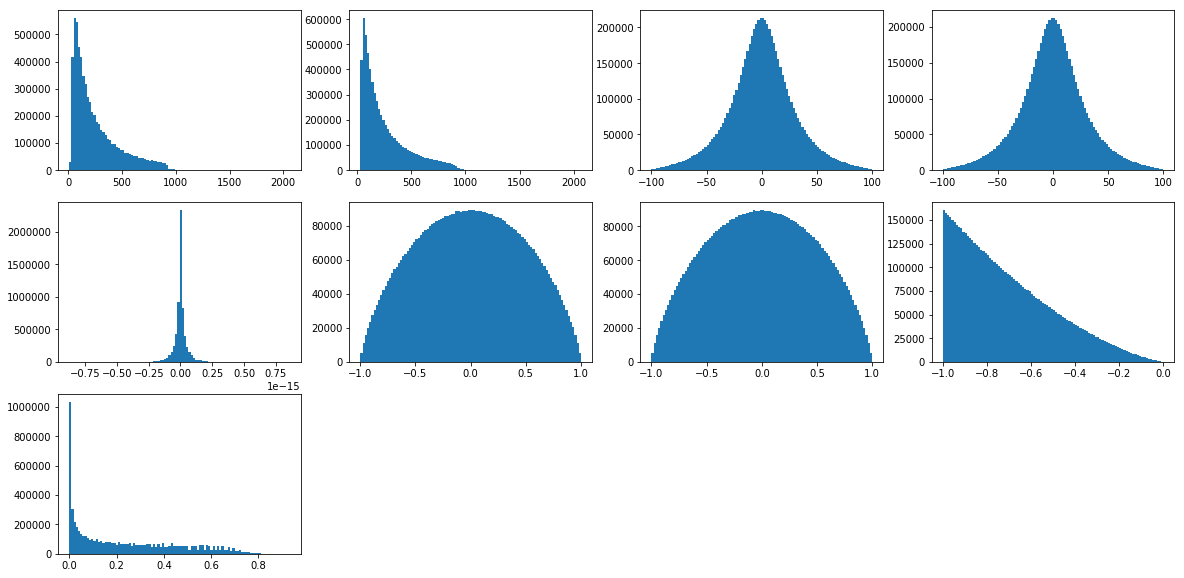

In [4]:
testRun()

-0.0


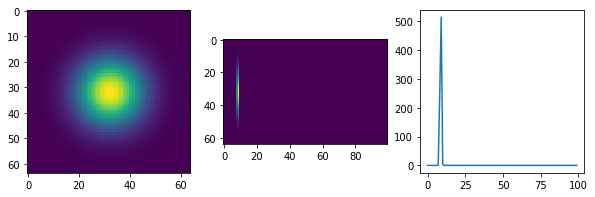

In [6]:
testRunDiffApprox()